# Histogram Eqalization

### Importing OpenCV package

In [1]:
import cv2

### Reading original image

In [2]:
image = cv2.imread('goat.jpg')

### Displaying image shape

In [10]:
image.shape

(4608, 3456, 3)

### Displaying the image with matplotlib.

In [3]:
import matplotlib.pyplot as plt

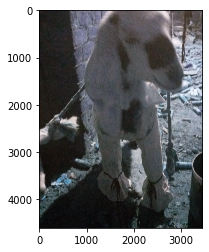

In [12]:
plt.imshow(image)

* #### OpenCV's default color space is BGR so we change it to RGB.

In [13]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

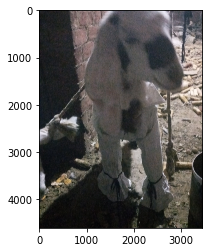

In [14]:
plt.imshow(new_image)

### Reading the image as grayscale image.

In [50]:
gs_image = cv2.imread("goat.jpg", cv2.IMREAD_GRAYSCALE)
gs_image

array([[ 17,  17,  14, ..., 112, 127, 137],
       [  8,   9,   9, ..., 118, 132, 139],
       [  9,   7,  10, ..., 118, 131, 135],
       ...,
       [ 16,  19,  15, ...,   6,   9,  14],
       [ 16,  18,  15, ...,   5,   7,  12],
       [ 14,  14,  13, ...,   3,   4,   8]], dtype=uint8)

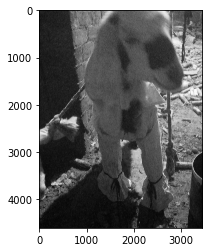

In [65]:
plt.imshow(gs_image, cmap='gray')

In [17]:
gs_image.shape

(4608, 3456)

### Importing numpy package for faster array calculations.

In [10]:
import numpy as np

### Showing image Histogram.

In [11]:
gs_image_histogram, bin_edges = np.histogram(gs_image[:, :], bins=256, range=(0, 256))

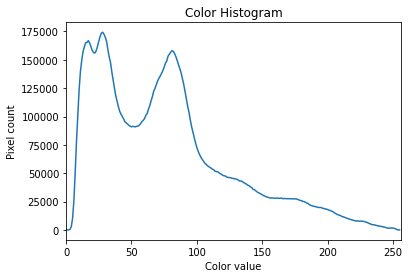

In [60]:
plt.figure()
plt.xlim([0, 256])
plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")
plt.plot(bin_edges[0:-1], gs_image_histogram)
plt.show()

# First Histogram Equalization method Comulative Distribution Frequency (CDF).

In [ ]:
cdf = []
temp = 0
for hv in gs_image_histogram:
    temp = temp + hv
    cdf.append(temp)


In [ ]:
cdf_np = np.array(cdf)
cdf_np

In [73]:
import copy
temp_image = copy.deepcopy(gs_image)
m_rows, n_columns = temp_image.shape
L = 256
cdf_min = cdf_np.min()

for row in range(m_rows):
    for col in range(n_columns):
        current_pixel_value = temp_image.item(row, col)
        cdf_value_for_current_pixel = cdf_np.item(current_pixel_value)
        equalized_pixel_value = (((cdf_value_for_current_pixel - cdf_min) * (L - 1))/ ((m_rows * n_columns) - cdf_min ))
        temp_image.itemset((row, col), round(equalized_pixel_value))

temp_image

array([[ 24,  24,  16, ..., 203, 214, 221],
       [  3,   4,   4, ..., 207, 218, 222],
       [  4,   1,   6, ..., 207, 217, 220],
       ...,
       [ 21,  29,  19, ...,   1,   4,  16],
       [ 21,  27,  19, ...,   0,   1,  11],
       [ 16,  16,  14, ...,   0,   0,   3]], dtype=uint8)

## New image after performing histogram equalization (CDF).

24


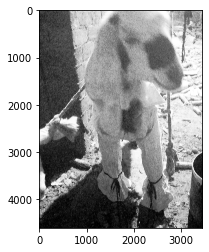

In [74]:
plt.imshow(temp_image, cmap='gray')

## Histogram of the equalized image (CDF).

In [75]:
temp_image_histogram, bin_edges = np.histogram(temp_image[:, :], bins=256, range=(0, 256))

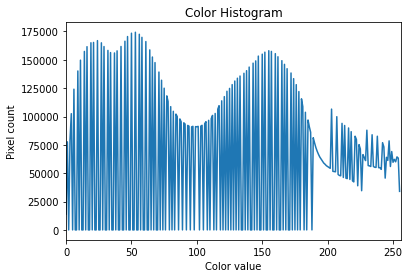

In [76]:
plt.figure()
plt.xlim([0, 256])
plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")
plt.plot(bin_edges[0:-1], temp_image_histogram)
plt.show()

### Saving the new image.

In [77]:
cv2.imwrite("test.jpg", temp_image)

True